# - <font color = blue>Importing Liabraries</font>

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# - <font color = green>Reading and understanding the data</FONT>

In [2]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
leads.info() # understanding the D-type of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
round(100*(leads.isnull().sum()/len(leads.index)), 2) # checking the percentage of the missing values

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# - <font color = Red>Cleaning the data </font>

In [7]:
# now we will drop those columns which have more than 40% null values
leads = leads.drop(['Asymmetrique Profile Score',  'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Lead Quality'], axis=1)

In [8]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [9]:
round(100*(leads.isnull().sum()/len(leads.index)), 2) # now checking the percentage of the missing values again

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# now we will drop those columns which returns the number of unique values which is equals to 1
leads = leads.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [12]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Select,Mumbai,No,Modified


In [13]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# now we can see that some column of leads has no use so we will drop them

In [16]:
leads = leads.drop(['City', 'Country'], axis=1)

In [17]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

- **As we can see specialisation contains 1942 select value in it which means The industry domain in which the customer worked 
  before includes the level 'Select Specialization' which means the customer had not selected this option while filling the 
  form but it also contains some information so dropping of this column will lead to data loss so we will look at this column after**
</br>

- **firstly there will be many more columns like this which remains unselected**

In [19]:
# lets get the value counts of all the columns

for x in leads:
    print(leads[x].astype('category').value_counts())

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [20]:
leads = leads.drop(['How did you hear about X Education', 'Lead Profile'], axis=1)

In [21]:
leads['Lead Origin']

0                           API
1                           API
2       Landing Page Submission
3       Landing Page Submission
4       Landing Page Submission
                 ...           
9235    Landing Page Submission
9236    Landing Page Submission
9237    Landing Page Submission
9238    Landing Page Submission
9239    Landing Page Submission
Name: Lead Origin, Length: 9240, dtype: object

In [22]:
# now we saw some of the columns are completely irrelevant like  Do Not Email,  Do Not Call etc so we will drop them 
# because they are not so important to be a part of our data

leads = leads.drop(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'What matters most to you in choosing a course'], axis=1)

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          7802 non-null   object 
 8   What is your current occupation         6550 non-null   object 
 9   Tags                                    5887 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [25]:
leads.shape

(9240, 12)

In [26]:
leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
Tags                                      3353
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [27]:
leads = leads.drop('Tags', axis=1)

In [28]:
leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [29]:
leads['Specialization'] = leads['Specialization'].fillna('not provided')

leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')

In [30]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [31]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [32]:
leads = leads[~pd.isnull(leads['Lead Source'])]

leads = leads[~pd.isnull(leads['TotalVisits'])]
 
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

leads = leads[~pd.isnull(leads['Last Activity'])]


In [33]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# - <FONT COLOR = brown>EDA</font>

In [34]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


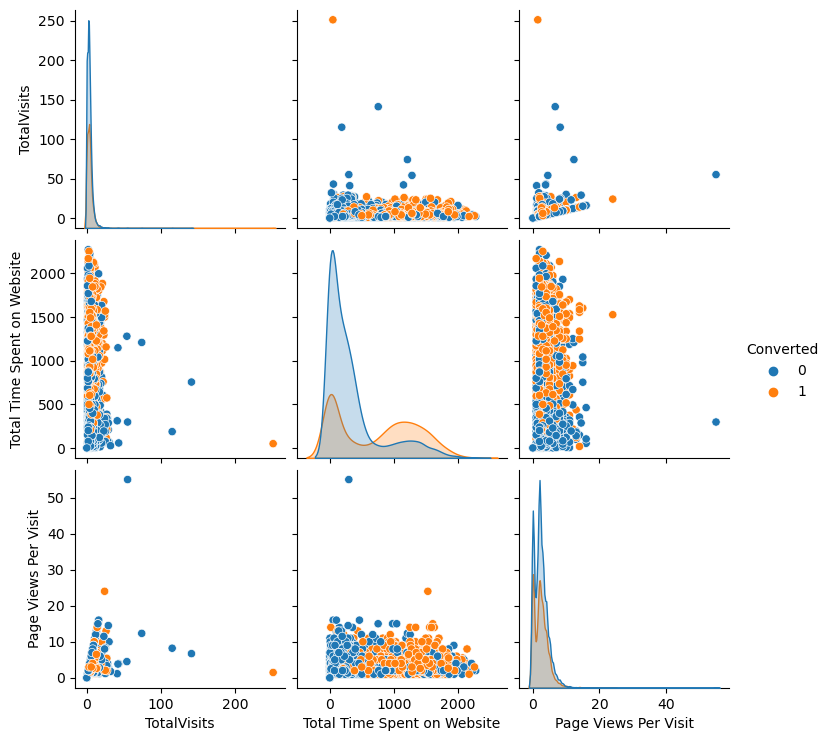

In [35]:
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

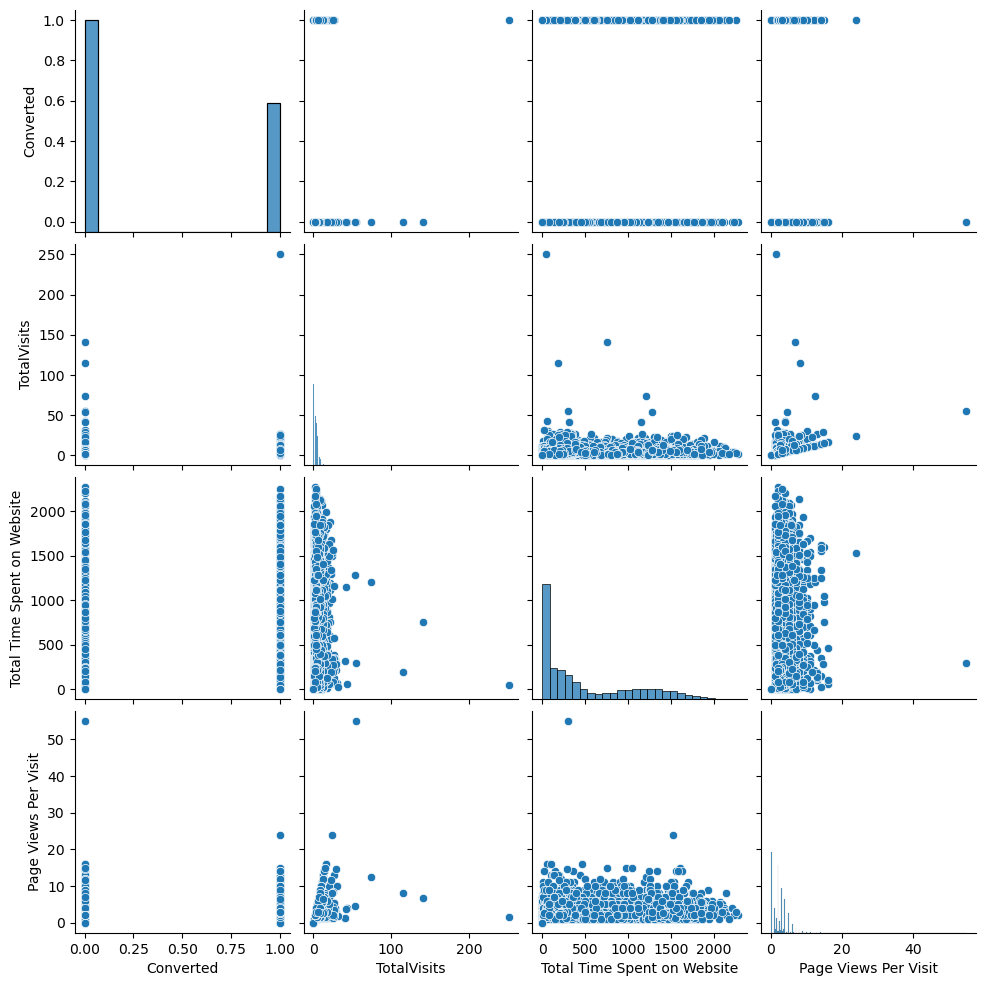

In [36]:
sns.pairplot(leads)

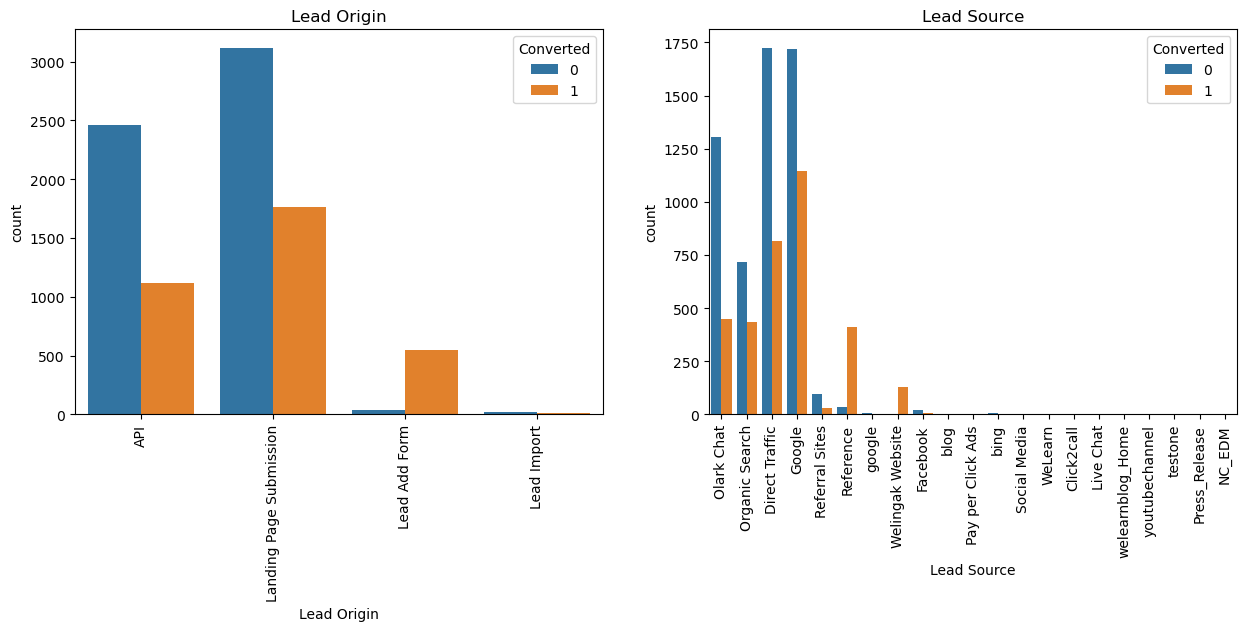

In [37]:
plt.figure(figsize = (15,11))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Last Activity')

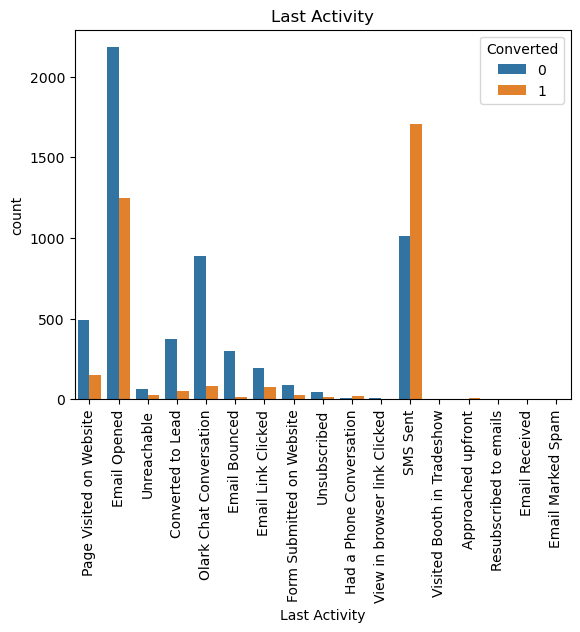

In [38]:
sns.countplot(x='Last Activity', hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

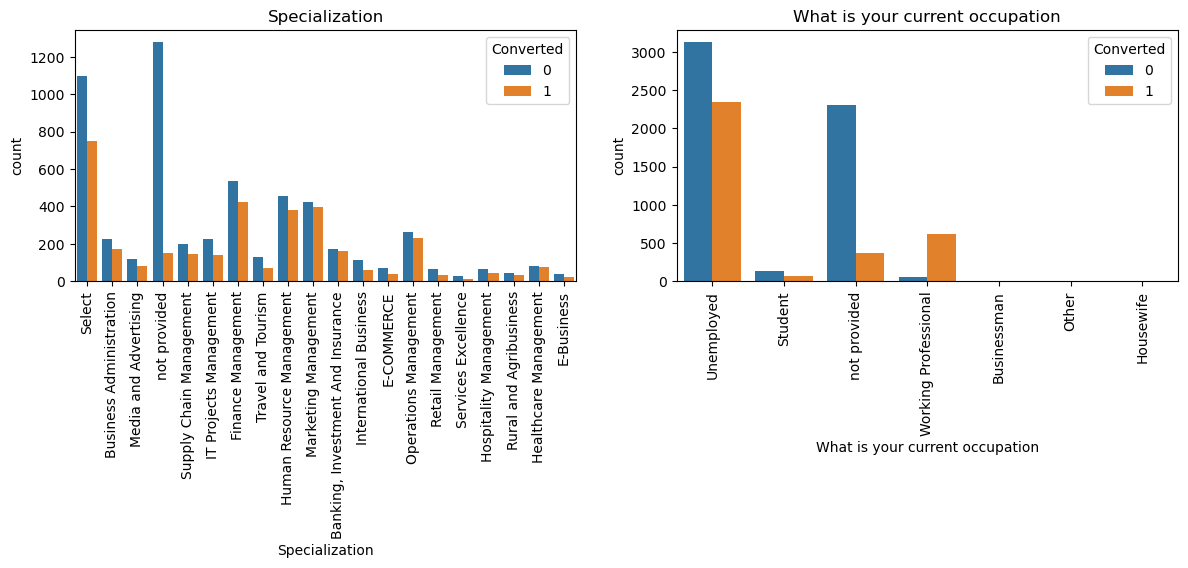

In [39]:
plt.figure(figsize = (22,15))


plt.subplot(4,3,1)
sns.countplot(x='Specialization', hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(4,3,2)
sns.countplot(x='What is your current occupation', hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

# - Dummy Variables

In [40]:
# now we will Creating dummy variables
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 
                               'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype=int)

leads = pd.concat([leads, dummy], axis=1)

In [41]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy = pd.get_dummies(leads['Specialization'], prefix = 'Specialization', dtype=int)
dummy = dummy.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [42]:
# Drop the variables  which has already dummy  
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [43]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# - <font color = purple>Train-Test Split</font>

In [44]:
# Import the required library

from sklearn.model_selection import train_test_split

In [45]:
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y = leads['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64

In [47]:
# Split into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# - <font color = darkgrey> Scaling by using MinMaxScaler</font>

In [48]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [49]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# - <font color = darkYellow> Correlations <font>
### lets look at the correlation by using heatmaps

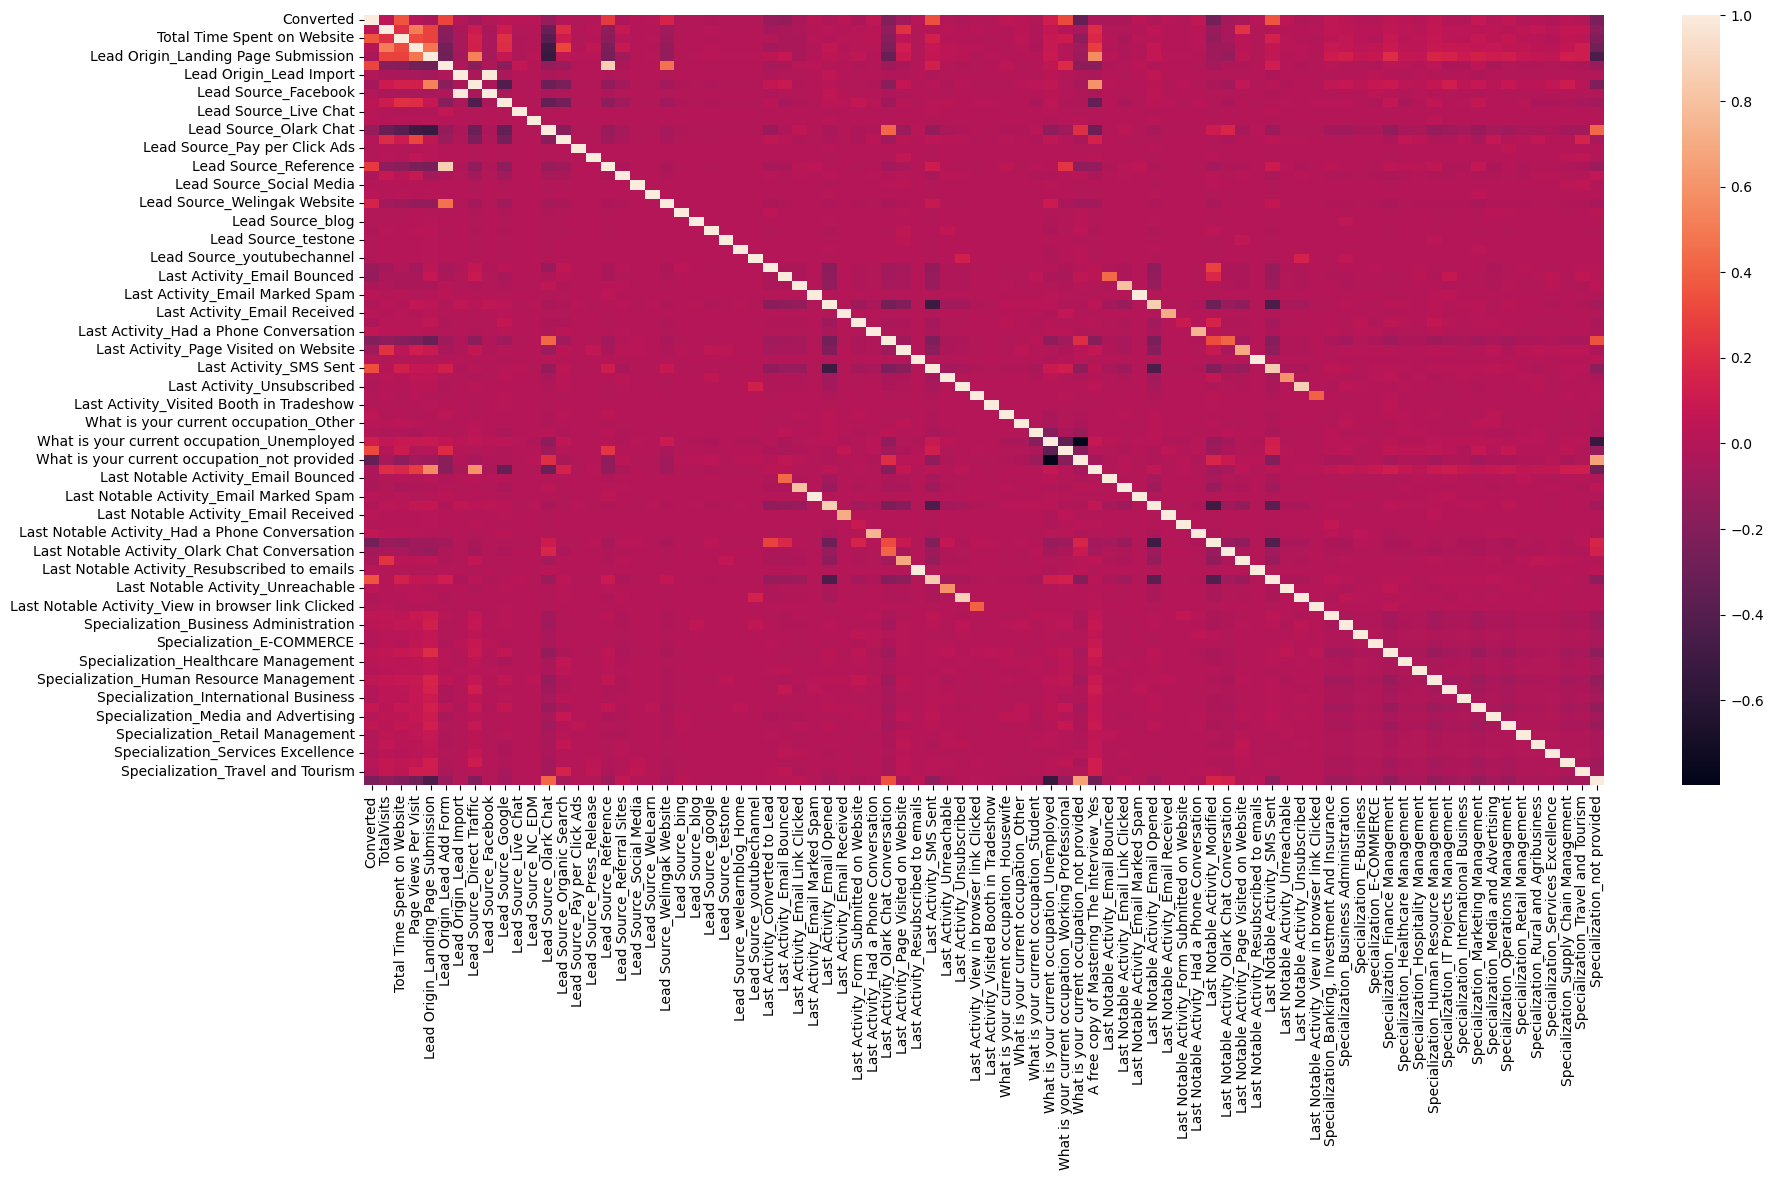

In [50]:
plt.figure(figsize = (20,10))
sns.heatmap(leads.corr())
plt.show()

# - <font color = safron>Model Building</font>

In [51]:
# Import LogisticRegression 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [52]:
# Import RFE

from sklearn.feature_selection import RFE

rfe = RFE(lr, n_features_to_select=20)             # running RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [53]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 60),
 ('Lead Source_blog', False, 45),
 ('Lead Source_google', False, 35),
 ('Lead Source_testone', False, 38),
 ('Lead Source_welearnblog_Home', False, 53),
 ('Lead 

In [54]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [55]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [56]:
# Import statsmodels

import statsmodels.api as sm

In [57]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.3
Date:                Sat, 24 Aug 2024   Deviance:                       5104.6
Time:                        08:10:29   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4110
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5589      0.094     -5.971      0.000      -0.742      -0.375
TotalVisits                                              6.5012      2.313      2.811      0.005       1.967      11.035
Total Time Spent on Website                              4.6527      0.168     27.692      0.000       4.323       4.982
Page Views Per Visit                                    -1.2746      0.563     -2.263      0.024      -2.378      -0.171
Lead Origin_Lead Add Form                                2.2062      0.229      9.627      0.000       1.757       2.655
Lead Source_Direct Traffic                              -1.6409      0.132    -12.435      0.000      -1.899      -1.382
Lead Source_Google                                      -1.1530      0.128     -8.977      0.000      -1.405      -0.901
Lead Source_Organic Search                              -1.4394      0.160     -8.971      0.000      -1.754      -1.125
Lead Source_Referral Sites                              -1.5111      0.373     -4.054      0.000      -2.242      -0.781
Lead Source_Welingak Website                             1.9001      0.752      2.527      0.011       0.426       3.374
Last Activity_Email Bounced                             -1.7935      0.380     -4.715      0.000      -2.539      -1.048
Last Activity_Had a Phone Conversation                   1.6400      1.035      1.585      0.113      -0.388       3.668
Last Activity_Olark Chat Conversation                   -0.9410      0.171     -5.519      0.000      -1.275      -0.607
Last Activity_Resubscribed to emails                    24.3766   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.1907      0.076     15.666      0.000       1.042       1.340
What is your current occupation_Housewife               22.6426   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Working Professional     2.4785      0.189     13.147      0.000       2.109       2.848
What is your current occupation_not provided            -1.2517      0.089    -14.075      0.000      -1.426      -1.077
Last Notable Activity_Had a Phone Conversation           1.6903      1.521      1.111      0.266      -1.290       4.671
Last Notable Activity_Modified                          -0.7731      0.083     -9.363      0.000      -0.935      -0.611
Last Notable Activity_Unreachable                        1.8510      0.493      3.757      0.000       0.885       2.817
========================================================================================================================
"""

In [58]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.49
10,Last Activity_Had a Phone Conversation,3.43
17,Last Notable Activity_Had a Phone Conversation,3.42
5,Lead Source_Google,3.13
4,Lead Source_Direct Traffic,2.70
1,Total Time Spent on Website,2.36
6,Lead Source_Organic Search,2.25
0,TotalVisits,1.89
18,Last Notable Activity_Modified,1.85
3,Lead Origin_Lead Add Form,1.54


In [60]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [61]:
# Refit the model with the new  features
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.2
Date:                Sat, 24 Aug 2024   Deviance:                       5114.4
Time:                        08:10:29   Pearson chi2:                 6.19e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4101
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5542      0.094     -5.924      0.000      -0.738      -0.371
TotalVisits                                              6.4591      2.305      2.802      0.005       1.942      10.977
Total Time Spent on Website                              4.6481      0.168     27.698      0.000       4.319       4.977
Page Views Per Visit                                    -1.2915      0.562     -2.297      0.022      -2.394      -0.189
Lead Origin_Lead Add Form                                2.2326      0.229      9.754      0.000       1.784       2.681
Lead Source_Direct Traffic                              -1.6330      0.132    -12.390      0.000      -1.891      -1.375
Lead Source_Google                                      -1.1462      0.128     -8.930      0.000      -1.398      -0.895
Lead Source_Organic Search                              -1.4275      0.160     -8.917      0.000      -1.741      -1.114
Lead Source_Referral Sites                              -1.5127      0.374     -4.045      0.000      -2.246      -0.780
Lead Source_Welingak Website                             1.8740      0.752      2.493      0.013       0.400       3.347
Last Activity_Email Bounced                             -1.7967      0.380     -4.723      0.000      -2.542      -1.051
Last Activity_Had a Phone Conversation                   2.5405      0.708      3.587      0.000       1.152       3.929
Last Activity_Olark Chat Conversation                   -0.9402      0.170     -5.515      0.000      -1.274      -0.606
Last Activity_Resubscribed to emails                    22.3726   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                   1.1844      0.076     15.593      0.000       1.036       1.333
What is your current occupation_Working Professional     2.4743      0.189     13.123      0.000       2.105       2.844
What is your current occupation_not provided            -1.2523      0.089    -14.094      0.000      -1.426      -1.078
Last Notable Activity_Modified                          -0.7817      0.082     -9.485      0.000      -0.943      -0.620
Last Notable Activity_Unreachable                        1.8437      0.493      3.742      0.000       0.878       2.809
========================================================================================================================
"""

In [62]:
# Make a VIF 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.49
5,Lead Source_Google,3.13
4,Lead Source_Direct Traffic,2.70
1,Total Time Spent on Website,2.36
6,Lead Source_Organic Search,2.25
0,TotalVisits,1.89
16,Last Notable Activity_Modified,1.85
3,Lead Origin_Lead Add Form,1.53
13,Last Activity_SMS Sent,1.53
15,What is your current occupation_not provided,1.43


In [63]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.9
Date:                Sat, 24 Aug 2024   Deviance:                       5119.8
Time:                        08:10:30   Pearson chi2:                 6.16e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4096
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5624      0.093     -6.020      0.000      -0.746      -0.379
TotalVisits                                              4.6888      1.825      2.569      0.010       1.112       8.266
Total Time Spent on Website                              4.6349      0.168     27.662      0.000       4.307       4.963
Lead Origin_Lead Add Form                                2.2415      0.229      9.797      0.000       1.793       2.690
Lead Source_Direct Traffic                              -1.7440      0.123    -14.213      0.000      -1.985      -1.504
Lead Source_Google                                      -1.2669      0.117    -10.827      0.000      -1.496      -1.038
Lead Source_Organic Search                              -1.5907      0.143    -11.120      0.000      -1.871      -1.310
Lead Source_Referral Sites                              -1.6544      0.368     -4.499      0.000      -2.375      -0.934
Lead Source_Welingak Website                             1.8723      0.752      2.491      0.013       0.399       3.345
Last Activity_Email Bounced                             -1.7690      0.380     -4.653      0.000      -2.514      -1.024
Last Activity_Had a Phone Conversation                   2.5479      0.710      3.589      0.000       1.156       3.939
Last Activity_Olark Chat Conversation                   -0.9331      0.170     -5.473      0.000      -1.267      -0.599
Last Activity_Resubscribed to emails                    22.3782   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                   1.1738      0.076     15.507      0.000       1.025       1.322
What is your current occupation_Working Professional     2.4681      0.188     13.094      0.000       2.099       2.838
What is your current occupation_not provided            -1.2497      0.089    -14.083      0.000      -1.424      -1.076
Last Notable Activity_Modified                          -0.7796      0.082     -9.470      0.000      -0.941      -0.618
Last Notable Activity_Unreachable                        1.8317      0.493      3.715      0.000       0.865       2.798
========================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.35
4,Lead Source_Google,2.25
3,Lead Source_Direct Traffic,2.06
15,Last Notable Activity_Modified,1.85
0,TotalVisits,1.71
5,Lead Source_Organic Search,1.60
12,Last Activity_SMS Sent,1.53
2,Lead Origin_Lead Add Form,1.53
14,What is your current occupation_not provided,1.43
10,Last Activity_Olark Chat Conversation,1.36


# - <font color = royalblue>Model Evaluation</font>

In [66]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.063437
1012    0.236069
9226    0.458065
4750    0.629116
7987    0.814478
1281    0.812762
2880    0.046767
4971    0.933659
7536    0.870512
1248    0.775944
dtype: float64

In [67]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06343725, 0.23606935, 0.45806496, 0.62911629, 0.81447818,
       0.81276222, 0.04676715, 0.93365927, 0.87051224, 0.77594409])

In [68]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.063437
1,0,0.236069
2,0,0.458065
3,1,0.629116
4,1,0.814478


In [69]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.063437,0
1,0,0.236069,0
2,0,0.458065,0
3,1,0.629116,1
4,1,0.814478,1


In [70]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [71]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3464  441]
 [ 734 1712]]


In [72]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [73]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.814989765391277


In [74]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Calculating sensitivity

TP/(TP+FN)

0.6999182338511856

In [76]:
# Calculating specificity

TN/(TN+FP)

0.887067861715749

In [77]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

# - <font color = bloodred>Call the ROC function</font>

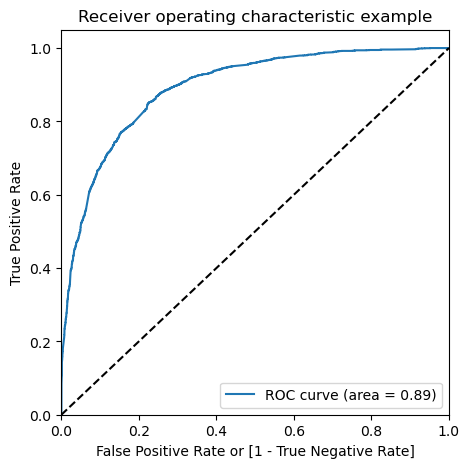

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [80]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.063437,0,1,0,0,0,0,0,0,0,0,0
1,0,0.236069,0,1,1,1,0,0,0,0,0,0,0
2,0,0.458065,0,1,1,1,1,1,0,0,0,0,0
3,1,0.629116,1,1,1,1,1,1,1,1,0,0,0
4,1,0.814478,1,1,1,1,1,1,1,1,1,1,0


In [81]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.644780  0.973426  0.438924
0.2   0.2  0.760195  0.921096  0.659411
0.3   0.3  0.797040  0.870809  0.750832
0.4   0.4  0.814832  0.775552  0.839437
0.5   0.5  0.814990  0.699918  0.887068
0.6   0.6  0.807747  0.632052  0.917798
0.7   0.7  0.785073  0.527800  0.946223
0.8   0.8  0.762872  0.432952  0.969526
0.9   0.9  0.715320  0.282911  0.986172


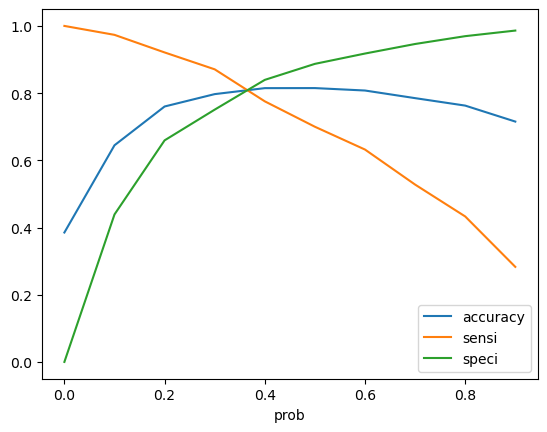

In [82]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
#0.35

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.063437,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.236069,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.458065,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.629116,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.814478,1,1,1,1,1,1,1,1,1,1,0,1


In [84]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8162494095418045

In [85]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3321,  584],
       [ 583, 1863]], dtype=int64)

In [86]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Calculate Sensitivity

TP/(TP+FN)

0.7616516762060507

In [88]:
# Calculate Specificity

TN/(TN+FP)

0.8504481434058899

# Making Predictions on the Test Set

In [89]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [90]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0.015936,0.070530,0.166667,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0.019920,0.679695,0.208333,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0.007968,0.033243,0.083333,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3830,0.031873,0.073675,0.333333,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [91]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [92]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,1.0,0.015936,0.070530,0.166667,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.019920,0.679695,0.208333,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7936,1.0,0.007968,0.033243,0.083333,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3830,1.0,0.031873,0.073675,0.333333,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.011952,0.372417,0.062500,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2879,1.0,0.007968,0.264600,0.083333,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6501,1.0,0.031873,0.599730,0.333333,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7155,1.0,0.011952,0.231357,0.125000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [93]:
# Drop the required columns from X_test as well

X_test.drop(['What is your current occupation_Housewife', 'What is your current occupation_Working Professional', 
             'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace = True)

In [94]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [95]:
y_test_pred[:10]

3271    0.067383
1490    0.867768
7936    0.046328
4216    0.043688
3830    0.097225
1800    0.167622
6507    0.715013
4821    0.453846
4223    0.540333
4714    0.469153
dtype: float64

In [96]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [97]:
# Let's see the head

y_pred_1.head()

,0
3271,0.067383
1490,0.867768
7936,0.046328
4216,0.043688
3830,0.097225


In [98]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [99]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [101]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.067383
1,1,0.867768
2,0,0.046328
3,1,0.043688
4,0,0.097225


In [102]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,0
0,0,0.067383
1,1,0.867768
2,0,0.046328
3,1,0.043688
4,0,0.097225


In [103]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})

In [104]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.067383
1,1,0.867768
2,0,0.046328
3,1,0.043688
4,0,0.097225


In [105]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)

In [106]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6224752111641572

In [107]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[962, 772],
       [256, 733]], dtype=int64)

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Calculate sensitivity
TP / float(TP+FN)

0.7411526794742164

In [110]:
# Calculate specificity
TN / float(TN+FP)

0.5547866205305652

# - <font color = charcolgrey> Precision-Recall View</font>

In [111]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3464,  441],
       [ 734, 1712]], dtype=int64)

# - <font color = cyan>Precision</font>
# `TP / TP + FP`

In [112]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7951695308871343

# - <font color = brown>Precision and recall tradeoff</font>

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

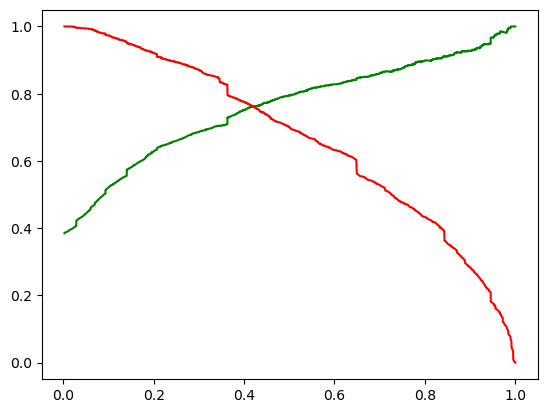

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.063437,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.236069,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.458065,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.629116,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.814478,1,1,1,1,1,1,1,1,1,1,0,1


In [118]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8154621319477248

In [ ]:
# 0.82

In [119]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3357,  548],
       [ 624, 1822]], dtype=int64)

In [120]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Calculate Precision

TP/(TP+FP)

0.7687763713080169

In [122]:
# Calculate Recall

TP/(TP+FN)

0.7448896156991006

# - <font color = lightblue> Making Predictions on the Test Set</font>
**Let's make predicitons on the test set.**

In [123]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [124]:
y_test_pred[:10]

3271    0.067383
1490    0.867768
7936    0.046328
4216    0.043688
3830    0.097225
1800    0.167622
6507    0.715013
4821    0.453846
4223    0.540333
4714    0.469153
dtype: float64

In [125]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head

y_pred_1.head()

,0
3271,0.067383
1490,0.867768
7936,0.046328
4216,0.043688
3830,0.097225


In [127]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [128]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.067383
1,1,0.867768
2,0,0.046328
3,1,0.043688
4,0,0.097225


In [131]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [132]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.067383
1,1,0.867768
2,0,0.046328
3,1,0.043688
4,0,0.097225


In [133]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [134]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.067383,0
1,1,0.867768,1
2,0,0.046328,0
3,1,0.043688,0
4,0,0.097225,0


In [135]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.626882115313992

In [ ]:
# 0.63

In [136]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[981, 753],
       [263, 726]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Calculate Precision

TP/(TP+FP)

0.4908722109533469

In [ ]:
# 0.49

In [139]:
# Calculate Recall

TP/(TP+FN)

0.7340748230535895

In [ ]:
# 0.73

# #<font color = orange>Conclusion :</font>

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 63%, 50% and 73% which are approximately closer to 
  the respective values calculated using trained set.
- Hence overall this model seems to be good.